In [1]:
import cv2
import hashlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load Image

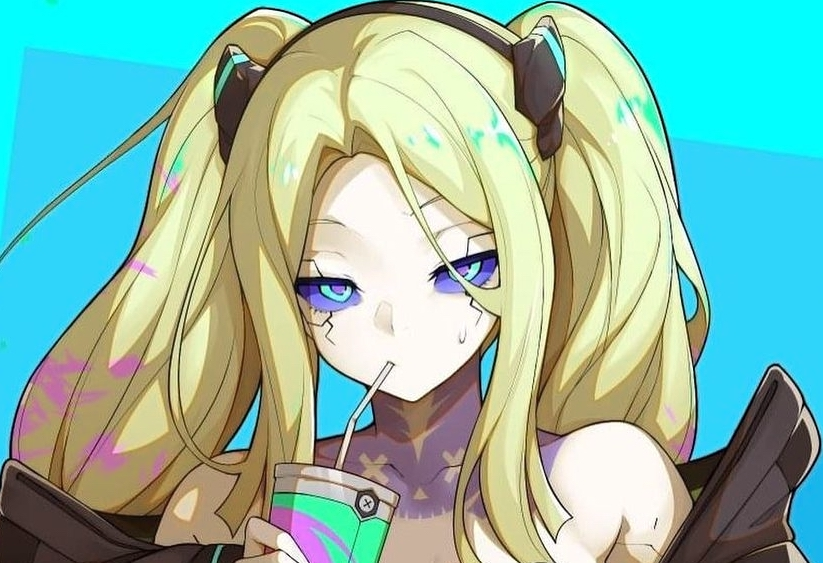

(563, 823, 3)

In [2]:
im_path = "C:\\Users\\Kashan\\Downloads\\rebecca.jpg"

image = cv2.imread(im_path)


#display(Image.fromarray(image))
display(Image.fromarray(image))
image.shape

# Split Image into Parts

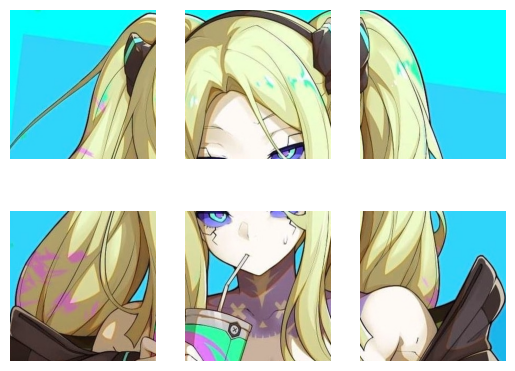

In [3]:

def split_image_into_parts(image, cols=3, rows=2):
    width, height = image.size
    p_width = (width // cols) 
    p_height = (height // rows) 
    parts = []
    for row in range(rows):
        for col in range(cols):
            left = col * p_width
            upper = row * p_height
            right = (col + 1) * p_width
            lower = (row + 1) * p_height
            part = image.crop((left, upper, right, lower))
            parts.append(part)
    return parts

im_parts = split_image_into_parts(Image.fromarray(image), cols=3, rows=2)
# Assuming you have the 'im_parts' variable containing the image parts
fig, axs = plt.subplots(2, 3)
for i, part in enumerate(im_parts):
    axs[i // 3, i % 3].imshow(part)
    axs[i // 3, i % 3].axis('off')

plt.show()

# Joining Back of Parts

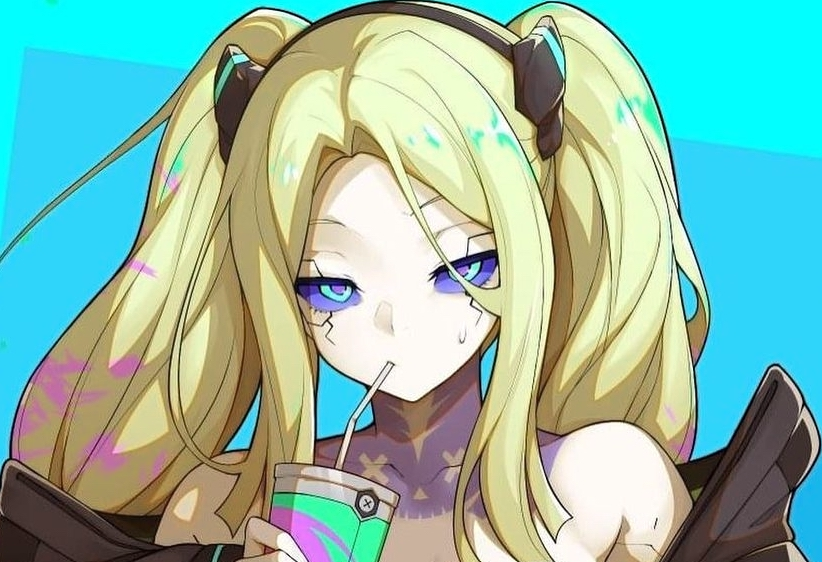

In [4]:
# your code here
import IPython.display as display

def join_image_parts(outer_list_tiles):
    # Convert NumPy array image parts to PIL images
    #image_parts = [Image.fromarray(part) for part in outer_list_tiles]

    # Get the size of the original image part
    part_width, part_height = outer_list_tiles[0].size

    # Calculate the dimensions of the joined image
    height = part_height * 2
    width = part_width * 3

    # Create a new blank image to join the parts
    joined_image = Image.new('RGBA', (width, height))

    # Iterate over the image parts and paste them into the joined image
    for i, part in enumerate(outer_list_tiles):
        x = (i % 3) * part_width
        y = (i // 3) * part_height
        joined_image.paste(part, (x, y))

    return joined_image

joined_image = join_image_parts(im_parts)
display.display(joined_image)


In [5]:
joined_image.size

(822, 562)

# Save joined Image


In [15]:

cv2.imwrite("E:\\testrepo\\res.jpg", np.array(joined_image))


True

# Compare Original and Saved Image Hashes (should be same)

In [11]:
def get_hash(file_path):
    return hashlib.md5(cv2.imread(file_path).tobytes()).hexdigest()

# Compare Hashes
new_im_path2 = "E:\\testrepo\\res.jpg"
im9=cv2.imread(new_im_path2)


print("Hash of original Image:",get_hash(im_path))
print("Hash of New Image:",get_hash(new_im_path2))


Hash of original Image: bf75c3e868ea5c763df58a56938c6a53
Hash of New Image: fb446d49d5d018f77833578a7e2dced7
